# Desafio 4
## Bruno Campello Tôrres de Azevedo Teles
## José Adeljan Marinho da Silva

In [ ]:
# load tqdm
!pip install --force https://github.com/chengs/tqdm/archive/colab.zip

# Importar as bibliotecas

In [ ]:
from random import random, randint
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Cadastro dos Produtos

Cadastro dos Produtos Disponíveis:


*   Nome
*   Volume Ocupado (m³)
*   Valor (R$)



In [ ]:
class Produto():
    def __init__(self, nome, estoque, lucro, area):
        self.nome = nome
        self.espaco = area
        self.valor = lucro
        self.estoque = estoque

    def __str__(self):
        return f"{self.nome}"

    def __repr__(self):
        return self.__str__()

Criar 3 listas para armazenas os atributos dos produtos cadastrados:


*   Espacos - (Lista com os volumes dos produtos)
*   Valores - (Lista com os preços)
*   Nomes - (Lista com os nomes)
*   Estoques - (Lista com os estoques)




In [ ]:
espacos = [65, 45, 58, 71, 71, 77, 90, 90, 65, 52, 90, 52, 71, 77, 58, 45, 65, 103, 71, 97]
valores = [2, 2, 3, 4, 4, 6, 5, 5, 6, 4, 2, 6, 5, 3, 4, 2, 2, 1, 5, 4]
estoques = [50, 35, 25, 20, 45, 50, 45, 40, 30, 50, 35, 50, 20, 25, 30, 20, 60, 35, 25, 45]
nomes = [f"Item {i}" for i in range(1, 21)]
limite = 37200

In [ ]:
lista_produtos = []

for vals in zip(nomes, estoques, valores, espacos):
    lista_produtos.append(Produto(*vals))

# Classe Indivíduo

In [ ]:
class Individuo():
    def __init__(self, espacos, valores, estoques, limite_espacos, geracao=0):
        self.espacos = espacos
        self.valores = valores
        self.estoques = estoques
        self.limite_espacos = limite_espacos
        self.nota_avaliacao = 0
        self.espaco_usado = 0
        self.geracao = geracao
        self.cromossomo = []

        for i in range(len(espacos)):
            self.cromossomo.append(randint(0, self.estoques[i]))

    def avaliacao(self):
        nota = 0
        soma_espacos = 0
        for i in range(len(self.cromossomo)):
            nota += self.valores[i] * self.cromossomo[i]
            soma_espacos += self.espacos[i] * self.cromossomo[i]
        if soma_espacos > self.limite_espacos:
            nota = 1
        self.nota_avaliacao = nota
        self.espaco_usado = soma_espacos

    def crossover(self, outro_individuo):
        corte = round(random() * len(self.cromossomo))

        filho1 = outro_individuo.cromossomo[0:corte] + self.cromossomo[corte::]
        filho2 = self.cromossomo[0:corte] + outro_individuo.cromossomo[corte::]

        filhos = [Individuo(self.espacos, self.valores, self.estoques, self.limite_espacos, self.geracao + 1),
                  Individuo(self.espacos, self.valores, self.estoques, self.limite_espacos, self.geracao + 1)]
        filhos[0].cromossomo = filho1
        filhos[1].cromossomo = filho2
        return filhos

    def mutacao(self, taxa_mutacao):
        for i in range(len(self.cromossomo)):
            if random() < taxa_mutacao:
                self.cromossomo[i] += randint(-5, 5)
            self.cromossomo[i] = max(min(self.cromossomo[i], self.estoques[i]), 0)
        return self

Visualização da criação de 1 indivíduo.

In [ ]:
indiv1 = Individuo(espacos, valores, estoques, limite)

for n, i in zip(nomes, indiv1.cromossomo):
  print(n, i)

Item 1 0
Item 2 29
Item 3 10
Item 4 20
Item 5 17
Item 6 34
Item 7 15
Item 8 6
Item 9 12
Item 10 19
Item 11 29
Item 12 30
Item 13 1
Item 14 20
Item 15 20
Item 16 4
Item 17 15
Item 18 35
Item 19 18
Item 20 21


Visualização da aptidão.

In [ ]:
indiv1.avaliacao()
for n, i in zip(nomes, indiv1.cromossomo):
  print(n, i)

print(f'Nota Avaliação: {indiv1.nota_avaliacao}, Espaco Usado: {indiv1.espaco_usado}')

Item 1 0
Item 2 29
Item 3 10
Item 4 20
Item 5 17
Item 6 34
Item 7 15
Item 8 6
Item 9 12
Item 10 19
Item 11 29
Item 12 30
Item 13 1
Item 14 20
Item 15 20
Item 16 4
Item 17 15
Item 18 35
Item 19 18
Item 20 21
Nota Avaliação: 1323, Espaco Usado: 25804


# Classe Algoritmo Genético

In [ ]:
class AlgoritmoGenetico():
    def __init__(self, tamanho_populacao):
        self.tamanho_populacao = tamanho_populacao
        self.populacao = []
        self.geracao = 0
        self.melhor_solucao = 0
        self.lista_solucoes = []

    def inicializa_populacao(self, espacos, valores, estoques, limite_espacos):
        for i in range(self.tamanho_populacao):
            self.populacao.append(Individuo(espacos, valores, estoques, limite_espacos))
        self.melhor_solucao = self.populacao[0]

    def ordena_populacao(self):
        self.populacao = sorted(self.populacao,
                                key = lambda populacao: populacao.nota_avaliacao,
                                reverse = True)

    def melhor_individuo(self, individuo):
        if individuo.nota_avaliacao > self.melhor_solucao.nota_avaliacao:
            self.melhor_solucao = individuo

    def soma_avaliacoes(self):
        soma = 0
        for individuo in self.populacao:
           soma += individuo.nota_avaliacao
        return soma

    def seleciona_pai(self, soma_avaliacao): #Seleção Metodo roleta
        pai = -1
        valor_sorteado = random() * soma_avaliacao
        soma = 0
        i = 0
        while i < len(self.populacao) and soma < valor_sorteado:
            soma += self.populacao[i].nota_avaliacao
            pai += 1
            i += 1
        return pai

    def visualiza_geracao(self):
        melhor = self.populacao[0]
        print("G:%s -> Valor: %s Espaço: %s Melhor Ind. Geração: %s" % (self.populacao[0].geracao,
                                                               melhor.nota_avaliacao,
                                                               melhor.espaco_usado,
                                                               melhor.cromossomo))

    def resolver(self, taxa_mutacao, numero_geracoes, espacos, valores, estoques, limite_espacos):
        self.inicializa_populacao(espacos, valores, estoques, limite_espacos)

        for individuo in self.populacao:
            individuo.avaliacao()

        self.ordena_populacao()
        self.melhor_solucao = self.populacao[0]
        self.lista_solucoes.append(self.melhor_solucao.nota_avaliacao)

        # self.visualiza_geracao()

        for geracao in range(numero_geracoes):
            soma_avaliacao = self.soma_avaliacoes()
            nova_populacao = []

            for individuos_gerados in range(0, self.tamanho_populacao, 2):
                pai1 = self.seleciona_pai(soma_avaliacao)
                pai2 = self.seleciona_pai(soma_avaliacao)

                filhos = self.populacao[pai1].crossover(self.populacao[pai2])

                nova_populacao.append(filhos[0].mutacao(taxa_mutacao))
                nova_populacao.append(filhos[1].mutacao(taxa_mutacao))

            self.populacao = list(nova_populacao)

            for individuo in self.populacao:
                individuo.avaliacao()

            self.ordena_populacao()

            # self.visualiza_geracao()

            melhor = self.populacao[0]
            self.lista_solucoes.append(melhor.nota_avaliacao)
            self.melhor_individuo(melhor)

        # print("\nMelhor solução -> G: %s Valor: %s Espaço: %s Cromossomo: %s" %
        #       (self.melhor_solucao.geracao,
        #        self.melhor_solucao.nota_avaliacao,
        #        self.melhor_solucao.espaco_usado,
        #        self.melhor_solucao.cromossomo))

        return self.melhor_solucao.nota_avaliacao, self.melhor_solucao.cromossomo

Inicializa populacao. Verifica o melhor individuo daquela população.

In [ ]:
ag1 = AlgoritmoGenetico(10)

ag1.inicializa_populacao(espacos, valores, estoques, limite)
print(ag1.populacao)

ag1.ordena_populacao()

print(ag1.populacao[0].cromossomo)

ag1.populacao[0].avaliacao()

print(f'Nota Avaliação: {ag1.populacao[0].nota_avaliacao}, Espaco Usado: {ag1.populacao[0].espaco_usado}')



[<__main__.Individuo object at 0x7971ea182260>, <__main__.Individuo object at 0x7971ea181a80>, <__main__.Individuo object at 0x7971ea181b40>, <__main__.Individuo object at 0x7971ea181780>, <__main__.Individuo object at 0x7971ea181750>, <__main__.Individuo object at 0x7971ea181720>, <__main__.Individuo object at 0x7971ea1817e0>, <__main__.Individuo object at 0x7971ea181360>, <__main__.Individuo object at 0x7971ea181300>, <__main__.Individuo object at 0x7971ea181030>]
[24, 8, 14, 4, 9, 9, 18, 6, 23, 4, 22, 37, 2, 14, 30, 20, 18, 6, 25, 12]
Nota Avaliação: 1179, Espaco Usado: 20702


# Execução Algoritmo

Define os parâmetros:

*   Volume disponível (m³)
*   Tamanho da população
*   Taxa de mutação entre as geracões
*   Número de Gerações



### Estudo dos Parâmetros

Algoritmo foi executado com diferentes combinações de parâmetros, e o melhor resultado é armazenado

In [ ]:
from tqdm import tqdm_notebook as tqdm

tamanho_populacao = [i*10 for i in range(2, 9)]
taxa_mutacao = [0.01] + [0.01 * i for i in range(5, 21, 5)]
numero_geracoes = [50, 100]
resultados = []
iters = list(itertools.product(tamanho_populacao, taxa_mutacao, numero_geracoes))

for (tp, tm, ng) in tqdm(iters, leave=True, desc="Progresso Geral"):
    melhor_resultado = 0
    melhor_ag = None
    # Como o processo é estocástico, executa 5 vezes por conjunto de params
    for _ in tqdm(range(5), desc=f"{tp=}, {tm=}, {ng=}", leave=False):
        ag = AlgoritmoGenetico(tp)
        resultado, _ = ag.resolver(tm, ng, espacos, valores, estoques, limite)
        if resultado > melhor_resultado:
            melhor_resultado = resultado
            melhor_ag = ag
    resultados.append({"params": (tp, tm, ng), "res": melhor_ag})

/usr/local/lib/python3.10/dist-packages/tqdm/_tqdm_notebook.py:86: TqdmExperimentalWarning: Detect Google Colab 0.0.1a2 and thus load dummy ipywidgets package. Note that UI is different from that in Jupyter. See https://github.com/tqdm/tqdm/pull/640
  warn("Detect Google Colab {} and thus load dummy ipywidgets package."


In [ ]:
resultados.sort(key=lambda x: x['res'].melhor_solucao.nota_avaliacao, reverse=True)

Exibição do Melhor Resultado

In [ ]:
melhor = resultados[0]
print("Melhor resultado:", melhor['res'].melhor_solucao.nota_avaliacao)
print("Parâmetros:\nTamanho da população =", melhor['params'][0])
print("Taxa de mutação =", melhor['params'][1])
print(f"Número de gerações =", melhor['params'][2])

Melhor resultado: 2283
Parâmetros:
Tamanho da população = 30
Taxa de mutação = 0.15
Número de gerações = 100


Visualização Gráfica.

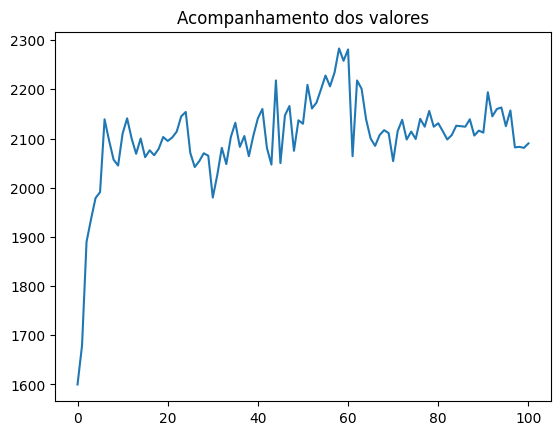

In [ ]:
plt.plot(melhor['res'].lista_solucoes)
plt.title("Acompanhamento dos valores")
plt.show()

Mais restrições que podem ser adicionadas são:
- Tempo para pegar um remédio
- Se há um remédio equivalente que poderia ser usado para contornar problemas de estoque
